### House Price Prediction Using Pytorch- Tabular Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [3]:
df.shape

(1201, 10)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
for i in df.columns:
    print("Column name {} and unique values are {}" .format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [7]:
import datetime
datetime.datetime.now().year

2025

In [8]:
df['Total Years'] = datetime.datetime.now().year-df['YearBuilt']

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,22
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,49
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,24
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,110
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,25


In [10]:
df.drop("YearBuilt", axis=1, inplace=True)

In [11]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [12]:
### Creating Categorical Features

cat_features = ['MSSubClass', 'MSZoning','Street', 'LotShape']
out_features = "SalePrice"

In [13]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85], dtype=int64)

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}
lbl_encoders["MSSubClass"] = LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [15]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [16]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}

for feature in cat_features:
    lbl_encoders[feature] = LabelEncoder()
    df[feature] = lbl_encoders[feature].fit_transform(df[feature])

In [17]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,22
1,0,3,80.0,9600,1,3,1262,0,181500,49
2,5,3,68.0,11250,1,0,920,866,223500,24
3,6,3,60.0,9550,1,0,961,756,140000,110
4,5,3,84.0,14260,1,0,1145,1053,250000,25
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,26
1456,0,3,85.0,13175,1,3,2073,0,210000,47
1457,6,3,66.0,9042,1,3,1188,1152,266500,84
1458,0,3,68.0,9717,1,3,1078,0,142125,75


In [18]:
## Stacking and converting into Tensor
cat_features = np.stack([df['MSSubClass'], df['MSZoning'], df['Street'], df['LotShape']], 1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [19]:
## Convert Numpy into Tensorsabs
import torch
cat_features = torch.tensor(cat_features, dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [20]:
## Create continious variable
cont_features = []
for i in df.columns:
    if i in ['MSSubClass', 'MSZoning', "Street", "LotShape", "SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [21]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [22]:
## stacking continious variable to a tensorabs
cont_values = np.stack([df[i].values for i in cont_features], axis=1)
cont_values = torch.tensor(cont_values, dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [23]:
cont_values.dtype

torch.float32

In [24]:
### Dependent Feature 
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int32  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int32  
 5   LotShape     1201 non-null   int32  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


In [26]:
cat_features.shape, cont_values.shape, y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [27]:
len(df['MSSubClass'].unique())

15

#### Embedding size for Categorical Columns

In [28]:
len(df['MSSubClass'].unique())

15

In [29]:
cat_dims = [len(df[col].unique()) for col in ['MSSubClass', 'MSZoning', "Street", "LotShape"]]
cat_dims # ---> Input Dimention

[15, 5, 2, 4]

In [30]:
### output dimension should be set based on the input dimension(min(50, feature dimension/2)
embedding_dim = [(x, min(50, (x+1) //2 )) for x in cat_dims]


In [31]:
#preprocessing steps
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [33]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [34]:
cat_featurez = cat_features[:4]
cat_featurez

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [35]:
pd.set_option('display.max_rows', 500)
embedding_val = []
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [36]:
embedding_val

[tensor([[-0.0131,  1.1290, -1.0849,  ..., -0.3575,  1.8917,  0.6586],
         [-0.1915,  1.0969,  1.1980,  ..., -0.1082, -0.6462,  2.5962],
         [-0.0131,  1.1290, -1.0849,  ..., -0.3575,  1.8917,  0.6586],
         ...,
         [-0.2748,  0.9458, -0.5089,  ...,  1.1769,  2.0202, -1.2086],
         [-0.1915,  1.0969,  1.1980,  ..., -0.1082, -0.6462,  2.5962],
         [-0.1915,  1.0969,  1.1980,  ..., -0.1082, -0.6462,  2.5962]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.1733,  0.1968, -0.2283],
         [ 0.1733,  0.1968, -0.2283],
         [ 0.1733,  0.1968, -0.2283],
         ...,
         [ 0.1733,  0.1968, -0.2283],
         [ 0.1733,  0.1968, -0.2283],
         [ 0.1733,  0.1968, -0.2283]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.5246],
         [0.5246],
         [0.5246],
         ...,
         [0.5246],
         [0.5246],
         [0.5246]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.4587, -0.3125],
         [-0.4587, -0.3125],
         [-1.2641,  0.1536],

In [37]:
z = torch.cat(embedding_val, 1)
z

tensor([[-0.0131,  1.1290, -1.0849,  ...,  0.5246, -0.4587, -0.3125],
        [-0.1915,  1.0969,  1.1980,  ...,  0.5246, -0.4587, -0.3125],
        [-0.0131,  1.1290, -1.0849,  ...,  0.5246, -1.2641,  0.1536],
        ...,
        [-0.2748,  0.9458, -0.5089,  ...,  0.5246, -0.4587, -0.3125],
        [-0.1915,  1.0969,  1.1980,  ...,  0.5246, -0.4587, -0.3125],
        [-0.1915,  1.0969,  1.1980,  ...,  0.5246, -0.4587, -0.3125]],
       grad_fn=<CatBackward0>)

In [38]:
## Implement dorpout
dropout = nn.Dropout(.4)

In [39]:
final_embed = dropout(z)
final_embed

tensor([[-0.0218,  1.8816, -1.8081,  ...,  0.8744, -0.7645, -0.5209],
        [-0.3192,  1.8282,  0.0000,  ...,  0.0000, -0.0000, -0.5209],
        [-0.0218,  1.8816, -1.8081,  ...,  0.8744, -2.1068,  0.0000],
        ...,
        [-0.0000,  0.0000, -0.8481,  ...,  0.0000, -0.0000, -0.5209],
        [-0.3192,  1.8282,  0.0000,  ...,  0.8744, -0.0000, -0.5209],
        [-0.0000,  1.8282,  1.9967,  ...,  0.0000, -0.7645, -0.5209]],
       grad_fn=<MulBackward0>)

In [40]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [41]:
len(cont_features)

5

In [42]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [43]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

### Define Loss And Optimizer

In [44]:
loss_function = nn.MSELoss() ## Later convert to RMSE
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [45]:
df.shape

(1201, 10)

In [46]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [47]:
cont_values.shape

torch.Size([1201, 5])

In [48]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [49]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [50]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.765625
Epoch number: 11 and the loss : 200493.59375
Epoch number: 21 and the loss : 200489.125
Epoch number: 31 and the loss : 200482.53125
Epoch number: 41 and the loss : 200473.234375
Epoch number: 51 and the loss : 200462.140625
Epoch number: 61 and the loss : 200447.328125
Epoch number: 71 and the loss : 200429.125
Epoch number: 81 and the loss : 200409.15625
Epoch number: 91 and the loss : 200382.0625
Epoch number: 101 and the loss : 200354.703125
Epoch number: 111 and the loss : 200322.875
Epoch number: 121 and the loss : 200290.25
Epoch number: 131 and the loss : 200254.046875
Epoch number: 141 and the loss : 200212.734375
Epoch number: 151 and the loss : 200162.328125
Epoch number: 161 and the loss : 200115.859375
Epoch number: 171 and the loss : 200058.203125
Epoch number: 181 and the loss : 200002.15625
Epoch number: 191 and the loss : 199942.53125
Epoch number: 201 and the loss : 199876.84375
Epoch number: 211 and the loss : 199808.28125

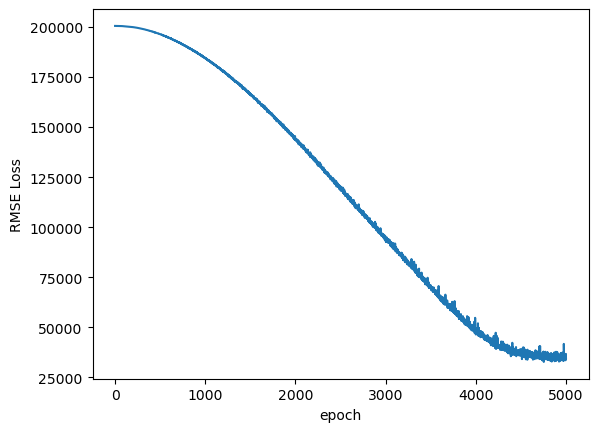

In [54]:
# Convert tensor losses to floats
final_losses = [loss.detach().cpu().item() for loss in final_losses]

# Now plot
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')
plt.show()


In [55]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [56]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [57]:
data_predicted

,Prediction
0,212793.671875
1,122829.234375
2,231747.625000
3,149616.562500
4,294662.125000
...,...
1015,126049.156250
1016,373486.718750
1017,167763.500000
1018,104411.812500


In [58]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,212793.671875,-82793.671875
1,138887.0,122829.234375,16057.765625
2,175500.0,231747.625000,-56247.625000
3,195000.0,149616.562500,45383.437500
4,142500.0,294662.125000,-152162.125000


In [59]:
#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')

In [60]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [61]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [62]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [63]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)